In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
df=pd.read_csv("StudentsPerformance 2.08.18 AM.csv")

In [29]:
df.head(1000)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   989 non-null    float64
 6   reading score                993 non-null    float64
 7   writing score                985 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [31]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     11
reading score                   7
writing score                  15
dtype: int64

In [44]:
df['math score']=df['math score'].fillna(df['math score'].mean(),axis=0)
df.dropna(subset=['reading score'],inplace=True)

In [45]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                      0
reading score                   0
writing score                  14
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       993 non-null    object 
 1   race/ethnicity               993 non-null    object 
 2   parental level of education  993 non-null    object 
 3   lunch                        993 non-null    object 
 4   test preparation course      993 non-null    object 
 5   math score                   993 non-null    float64
 6   reading score                993 non-null    float64
 7   writing score                979 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.8+ KB


In [9]:
df['reading score'].fillna(df['reading score'].mean(),inplace=True,axis=0)

In [10]:
df['writing score'].fillna(df['writing score'].mean(),inplace=True,axis=0)

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df['math score']=df['math score'].astype(int)

<Axes: >

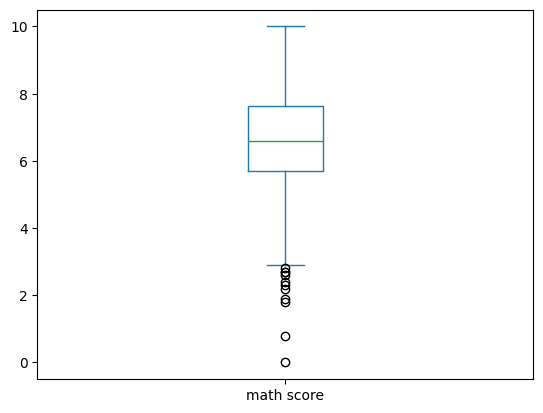

In [22]:
df['math score'].plot(kind="box")

In [14]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                  float64
writing score                  float64
dtype: object

In [15]:
for cols in df.columns:
    if df[cols].dtype=='object':
        df[cols]=LabelEncoder().fit_transform(df[cols])

In [16]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72.0,74.0
1,0,2,4,1,0,69,90.0,88.0
2,0,1,3,1,1,90,95.0,93.0
3,1,0,0,0,1,47,57.0,44.0
4,1,2,4,1,1,76,78.0,75.0


In [19]:
df[['math score']]=scaler.fit_transform(df[['math score']])  #data transformation minmax scalling

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,7.2,72.0,74.0
1,0,2,4,1,0,6.9,90.0,88.0
2,0,1,3,1,1,9.0,95.0,93.0
3,1,0,0,0,1,4.7,57.0,44.0
4,1,2,4,1,1,7.6,78.0,75.0


<Axes: >

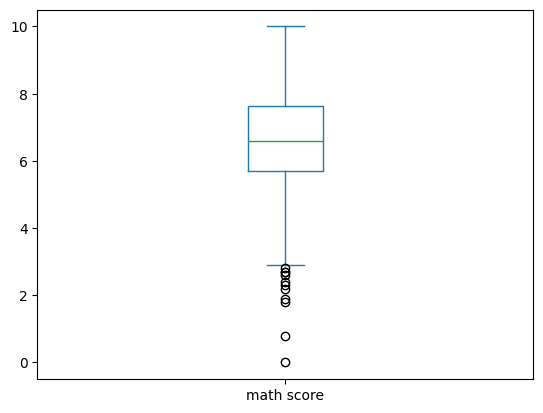

In [23]:
df['math score'].plot(kind="box")

In [ ]:
df